# FAANG Stock Analysis (As of 15 Jan 2022)

---

**Table of Content**

---

# 1.0 Objectives

- To predict BUY and SELL date for FAANG stock
- Forecast closing price of FAANG for T+30 days

# 2.0 Dataset Information

### 2.1 Description
FAANG refers to Meta (previously known as Facebook), Amazon, Apple, Netflix and Alphabet (previously known as Google). These five corporate stock bundled together is widely known as the FAANG. They are the pioneer in the tech industry. All of them are listed on the Nasdaq Stock Market in the United States(US).

The FAANG stock dataset will fetch directly using *pandas_datareader* library with the source from *Yahoo Finance*

## 2.2 Data Dictionary
Their stock ticker symbol as follows:

|Corporate|Ticker Symbol|
| :---    | :---        |
| Meta Platforms, Inc | FB |
| Amazon.com., Inc | AMZN |
| Apple Inc. | AAPL |
| Netflix, Inc. | NFLX |
| Alphabet Inc. | GOOG |

## 2.3 Assumption
- The dataset will only consist Alphabet Class C stock (GOOG). Alphabet Class A stock (GOOGL) will not take into consideration.
- Adopt swing trading style
- Holding for any security has a minimum 1 and maximum 20 business days for BUY position
- Will not execute SHORT position for any security
- Risk management is involved when trading the stock

# 3.0 Import Library

In [1]:
# System
import sys
import os

# Date
from datetime import date, datetime, timedelta

# Fetch data
import pandas_datareader.data as web

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

In [2]:
# RNN model
import tensorflow as tf

<br />

# 4.0 Set Constant and Default Settings

In [2]:
plt.rcParams['figure.dpi'] = 150
sns.set_style('dark')

In [3]:
# Date
today_date = date.today()
one_year_duration = timedelta(days=365)
data_format = '%Y-%m-%d'

# Stock info source
data_source = 'yahoo'

# FAANG info
faang = {
    'FB': {
        'ticker': 'FB',
        'filename': 'fb.csv'
    },
    'AMZN': {
        'ticker': 'AMZN',
        'filename': 'amzn.csv'
    },
    'AAPL': {
        'ticker': 'AAPL',
        'filename': 'aapl.csv'
    },
    'NFLX': {
        'ticker': 'NFLX',
        'filename': 'nlfx.csv'
    },
    'GOOG': {
        'ticker': 'GOOG',
        'filename': 'goog.csv'
    }
}

<br />

# 5.0 Fetch, Write and Load Dataset

In [6]:
def fetch_faang_stock(end_date = today_date):
    start_date = end_date - one_year_duration
    
    start = start_date.strftime(data_format)
    end = end_date.strftime(data_format)
    
    for ticker, info in faang.items():
        df = web.DataReader(ticker, data_source, start=start, end=end)

        df = df.reset_index()
        df.to_csv(info['filename'], index=False)

In [7]:
fetch_faang_stock(datetime(2021, 1, 15))

In [8]:
fb_df = pd.read_csv(faang['FB']['filename'], parse_dates=['Date'])
amzn_df = pd.read_csv(faang['AMZN']['filename'], parse_dates=['Date'])
aapl_df = pd.read_csv(faang['AAPL']['filename'], parse_dates=['Date'])
nflx_df = pd.read_csv(faang['NFLX']['filename'], parse_dates=['Date'])
goog_df = pd.read_csv(faang['GOOG']['filename'], parse_dates=['Date'])

<br />

# 6.0 Statistics Summary of Dataset

In [ ]:
fb_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-15,221.679993,220.139999,220.610001,221.149994,10036500,221.149994
1,2020-01-16,222.630005,220.389999,222.570007,221.770004,10015300,221.770004
2,2020-01-17,222.289993,220.529999,222.029999,222.139999,15905900,222.139999
3,2020-01-21,222.369995,219.119995,222.160004,221.440002,14275800,221.440002
4,2020-01-22,222.750000,221.279999,222.309998,221.320007,12212800,221.320007


In [ ]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   High       254 non-null    float64       
 2   Low        254 non-null    float64       
 3   Open       254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Volume     254 non-null    int64         
 6   Adj Close  254 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [ ]:
amzn_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-15,1878.859985,1855.089966,1872.250000,1862.020020,2896600,1862.020020
1,2020-01-16,1885.589966,1866.020020,1882.989990,1877.939941,2659500,1877.939941
2,2020-01-17,1886.640015,1857.250000,1885.890015,1864.719971,3997300,1864.719971
3,2020-01-21,1894.270020,1860.000000,1865.000000,1892.000000,3707800,1892.000000
4,2020-01-22,1902.500000,1883.339966,1896.089966,1887.459961,3216300,1887.459961


In [ ]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   High       254 non-null    float64       
 2   Low        254 non-null    float64       
 3   Open       254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Volume     254 non-null    int64         
 6   Adj Close  254 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [ ]:
aapl_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,76.695770
1,2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,77.656487
2,2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,78.516220
3,2020-01-21,79.754997,79.000000,79.297501,79.142502,110843200.0,77.984123
4,2020-01-22,79.997498,79.327499,79.644997,79.425003,101832400.0,78.262482


In [ ]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   High       254 non-null    float64       
 2   Low        254 non-null    float64       
 3   Open       254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Volume     254 non-null    float64       
 6   Adj Close  254 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.0 KB


In [ ]:
nflx_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-15,343.170013,336.600006,338.679993,339.070007,5158000,339.070007
1,2020-01-16,343.559998,335.850006,343.500000,338.619995,5016000,338.619995
2,2020-01-17,341.570007,337.380005,341.000000,339.670013,6066500,339.670013
3,2020-01-21,341.000000,332.589996,340.000000,338.109985,14350300,338.109985
4,2020-01-22,336.299988,323.600006,332.549988,326.000000,21730000,326.000000


In [ ]:
nflx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   High       254 non-null    float64       
 2   Low        254 non-null    float64       
 3   Open       254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Volume     254 non-null    int64         
 6   Adj Close  254 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [ ]:
goog_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-15,1441.395020,1430.209961,1430.209961,1439.199951,1282700,1439.199951
1,2020-01-16,1451.989990,1440.920044,1447.439941,1451.699951,1173700,1451.699951
2,2020-01-17,1481.295044,1458.219971,1462.910034,1480.390015,2396200,1480.390015
3,2020-01-21,1491.849976,1471.199951,1479.119995,1484.400024,2036700,1484.400024
4,2020-01-22,1503.213989,1484.930054,1491.000000,1485.949951,1610800,1485.949951


In [ ]:
nflx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   High       254 non-null    float64       
 2   Low        254 non-null    float64       
 3   Open       254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Volume     254 non-null    int64         
 6   Adj Close  254 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


All the FAANG dataset don't have missing value. The total trading days for the past year from 15 Jan 2022 is 254 days.

<br />

# 7.0 EDA

## 7.1 Past 1 Year Adj Close Price of Individual FAANG Stocks

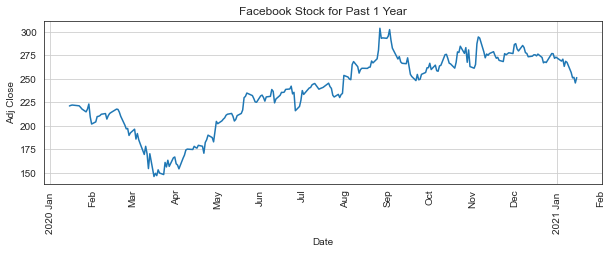

In [ ]:
ax = sns.lineplot(data=fb_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Facebook Stock for Past 1 Year')

plt.show()

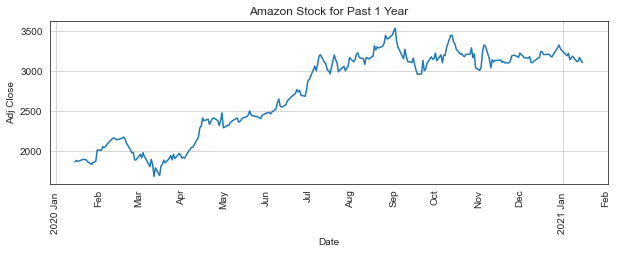

In [ ]:
ax = sns.lineplot(data=amzn_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Amazon Stock for Past 1 Year')

plt.show()

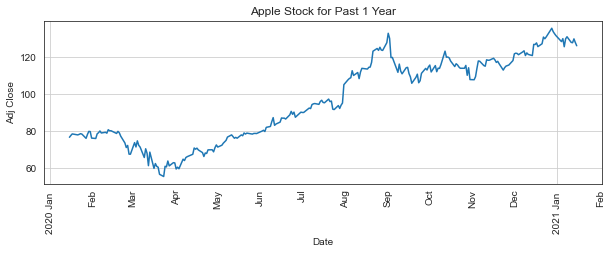

In [ ]:
ax = sns.lineplot(data=aapl_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Apple Stock for Past 1 Year')

plt.show()

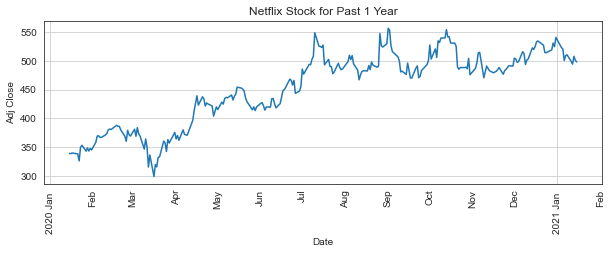

In [ ]:
ax = sns.lineplot(data=nflx_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Netflix Stock for Past 1 Year')

plt.show()

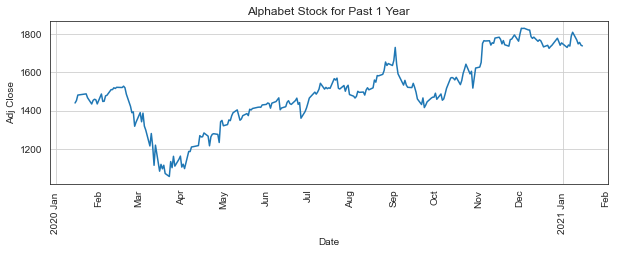

In [ ]:
ax = sns.lineplot(data=goog_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Alphabet Stock for Past 1 Year')

plt.show()

## 7.2 Daily Return of FAANG Stocks

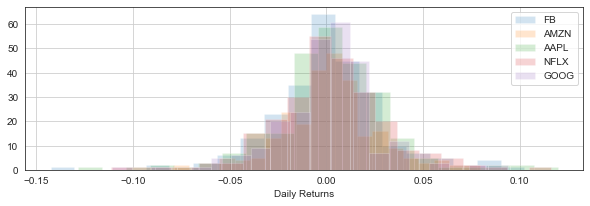

In [ ]:
fb_df['Adj Close'].pct_change(1).hist(label='FB',alpha=0.2,bins=20)
amzn_df['Adj Close'].pct_change(1).hist(label='AMZN',alpha=0.2,bins=20)
aapl_df['Adj Close'].pct_change(1).hist(label='AAPL',alpha=0.2,bins=20)
nflx_df['Adj Close'].pct_change(1).hist(label='NFLX',alpha=0.2,bins=20)
goog_df['Adj Close'].pct_change(1).hist(label='GOOG',alpha=0.2,bins=20)

plt.xlabel("Daily Returns")
plt.legend()

<br />

# 8.0 Preprocess

In [ ]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
          self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
            
        return inputs, labels
    
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)
        
        ds = ds.map(self.split_window)
        
        return ds
    
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    
    @property
    def val(self):
        return self.make_dataset(self.val_df)

    
    @property
    def test(self):
        return self.make_dataset(self.test_df)

    
    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result
    
    
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=patience,
                                                        mode='min')
    
    model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.optimizers.Adam(),
                    metrics=[tf.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                          validation_data=window.val,
                          callbacks=[early_stopping])
    
    return history

In [ ]:
fb_df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Log Adj Close'],
      dtype='object')

In [ ]:
fb_df_len = len(fb_df)
fb_train_df = fb_df[:int(fb_df_len * 0.7)]
fb_val_df = fb_df[int(fb_df_len * 0.7):int(fb_df_len * 0.9)]
fb_test_df = fb_df[int(fb_df_len * 0.9):]

In [ ]:
fb_window = WindowGenerator(input_width=10, label_width=1, shift=10, label_columns=['Adj Close'], 
                            train_df=fb_train_df, val_df=fb_val_df, test_df=fb_test_df)

In [ ]:
fb_window

Total window size: 20
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [19]
Label column name(s): ['Adj Close']

In [ ]:
val_performance = {}
performance = {}

In [ ]:
wide_window = WindowGenerator(input_width=10, label_width=1, shift=10, label_columns=['Adj Close'], 
                            train_df=fb_train_df, val_df=fb_val_df, test_df=fb_test_df)

In [ ]:
wide_window.train_df

,Date,High,Low,Open,Close,Volume,Adj Close,Log Adj Close
0,2020-01-15,221.679993,220.139999,220.610001,221.149994,10036500,221.149994,5.398841
1,2020-01-16,222.630005,220.389999,222.570007,221.770004,10015300,221.770004,5.401641
2,2020-01-17,222.289993,220.529999,222.029999,222.139999,15905900,222.139999,5.403308
3,2020-01-21,222.369995,219.119995,222.160004,221.440002,14275800,221.440002,5.400152
4,2020-01-22,222.750000,221.279999,222.309998,221.320007,12212800,221.320007,5.399610
...,...,...,...,...,...,...,...,...
172,2020-09-21,249.949997,244.130005,247.539993,248.149994,24709400,248.149994,5.514033
173,2020-09-22,255.320007,248.220001,253.309998,254.750000,30293100,254.750000,5.540283
174,2020-09-23,257.989990,248.149994,255.259995,249.020004,19641300,249.020004,5.517533
175,2020-09-24,252.240005,245.619995,246.500000,249.529999,20006800,249.529999,5.519579


In [ ]:
wide_window = WindowGenerator(input_width=10, label_width=1, shift=10, label_columns=['Adj Close'], 
                            train_df=fb_train_df, val_df=fb_val_df, test_df=fb_test_df)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=64)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

TypeError: float() argument must be a string or a number, not 'Timestamp'

# 8.0 Building Model

# 7.0 Summary